In [2]:
!pip install pydeck geopandas -q

In [3]:
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]' -q

In [4]:
%load_ext google.cloud.bigquery

In [5]:
import pydeck as pdk
import geopandas as gpd
from shapely import wkt
import matplotlib
import matplotlib.cm as cm

In [88]:
%%bigquery df
with energy_time_neighbourhood as (

    select 
        dim_date.calendar_year,
        dim_neighbourhood.municipality_name,
        avg(fct_energy_label.energy_label_numeric) as mean_energy_label
    from 
        `quantile.analytics.fct_energy_label` fct_energy_label
    inner join 
        `quantile.analytics.dim_date` dim_date
    on 
        fct_energy_label.measurement_date_key = dim_date.date_key
    inner join
        `quantile.analytics.dim_neighbourhood` dim_neighbourhood
    on 
        fct_energy_label.neighbourhood_key = dim_neighbourhood.neighbourhood_key
    group by 
        dim_date.calendar_year,
        dim_neighbourhood.municipality_name

)

select 
    *
from 
    energy_time_neighbourhood

Downloading: 100%|██████████| 3881/3881 [00:01<00:00, 3793.35rows/s]


In [89]:
df['calendar_year'] = pd.to_datetime(df['calendar_year'], format='%Y')

df

,calendar_year,municipality_name,mean_energy_label
0,2021-01-01,Almere,6.097561
1,2021-01-01,Hof van Twente,8.000000
2,2021-01-01,Rotterdam,7.343309
3,2013-01-01,Heerlen,7.614035
4,2018-01-01,Utrecht,7.239502
...,...,...,...
3876,2011-01-01,Schiermonnikoog,11.000000
3877,2013-01-01,Wormerland,7.000000
3878,2011-01-01,Hardinxveld-Giessendam,8.000000
3879,2011-01-01,Wormerland,11.000000


In [90]:
df.groupby('municipality_name').agg({'mean_energy_label': 'mean'}).sort_values('mean_energy_label')

,mean_energy_label
municipality_name,
Almere,6.792361
Zeewolde,6.795214
Heerhugowaard,6.883239
Lelystad,6.909368
Lansingerland,6.916678
...,...
Heemstede,8.667975
Vlieland,8.681748
Westerwolde,8.683410


In [91]:
amsterdam = df[df['municipality_name'].isin({'Ameland', 'Almere', 'Amsterdam'})]
amsterdam

,calendar_year,municipality_name,mean_energy_label
0,2021-01-01,Almere,6.097561
13,2020-01-01,Amsterdam,7.754710
31,2019-01-01,Amsterdam,7.632029
55,2015-01-01,Amsterdam,8.190580
58,2017-01-01,Amsterdam,7.800972
69,2013-01-01,Almere,7.297149
83,2011-01-01,Amsterdam,8.186166
86,2016-01-01,Amsterdam,8.106580
103,2012-01-01,Amsterdam,8.216638
107,2013-01-01,Amsterdam,7.733146


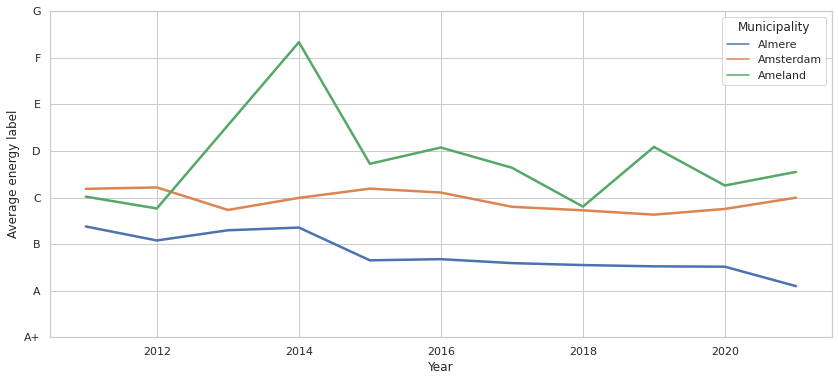

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.subplots(figsize=(14,6))
                
g = sns.lineplot(
    data=amsterdam, 
    x="calendar_year", 
    y='mean_energy_label', 
    hue="municipality_name", 
    linewidth=2.5
)
g.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12][4:]) # <--- set the ticks first
g.set_yticklabels(['A+++++','A++++','A+++','A++','A+','A','B','C', 'D', 'E', 'F', 'G'][4:])
g.set_ylabel('Average energy label')
g.set_xlabel('Year')
g.legend(title='Municipality');

In [ ]:
A